# K-Means Clustering

- Bank Transactions

### Step - 1 Import necessary libraries

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore") 

### Step - 2 Load and inspect the dataset

In [5]:
# load the dataset

data=pd.read_csv("c:\\Users\\Administrator\\Downloads\\bank_transactions.csv")



In [6]:
# Explore the dataset 
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


### Step - 3 Data preprocessing 

In [8]:
# convert the ' transactiondate ' column to data and time format

data['TransactionDate']= pd.to_datetime(data['TransactionDate'],format='%d-%m-%Y')


In [9]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [10]:
# drop row with missing values
data.dropna(inplace=True)

In [11]:
# select numeric features for clustring 


numeric_feature=data[['CustAccountBalance','TransactionAmount (INR)']] 

In [12]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [13]:
# standardize the data

scaler= StandardScaler()
scaled_feature=scaler.fit_transform(numeric_feature)

### Step - 4 Exploratory data Analysis (EDA)

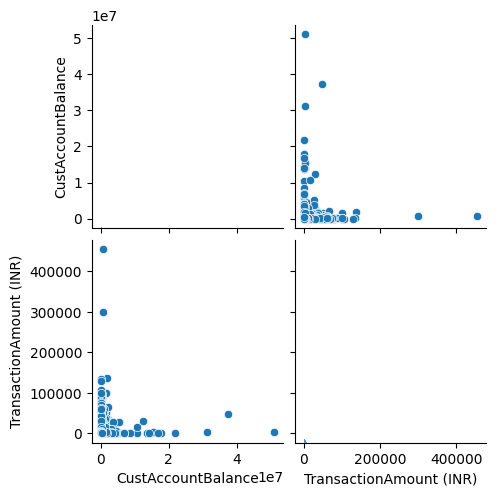

In [14]:
sns.pairplot(data[['CustAccountBalance','TransactionAmount (INR)']])
plt.show()

### Step - 5  Finding the optimal number of clusters (K)

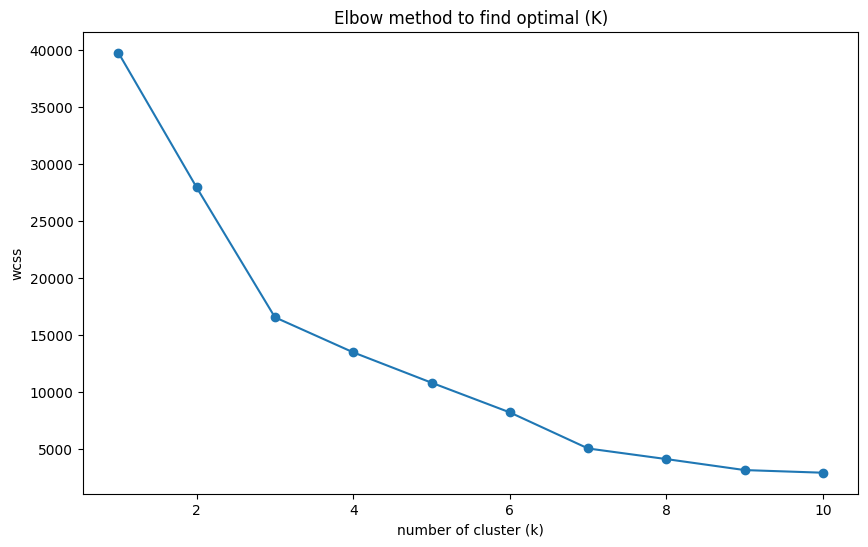

In [15]:
# using the elbow method to find the optimal numbers of cluster (K)

wcss=[]     # within cluster sum of square

for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=45)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)


# plot the elbow method graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='-')
plt.xlabel('number of cluster (k)')
plt.ylabel('wcss')
plt.title('Elbow method to find optimal (K)')
plt.show()

In [16]:
# perform k mean clustering

kmeans= KMeans(n_clusters=3,random_state=45)
data['Cluster']=kmeans.fit_predict(scaled_feature)

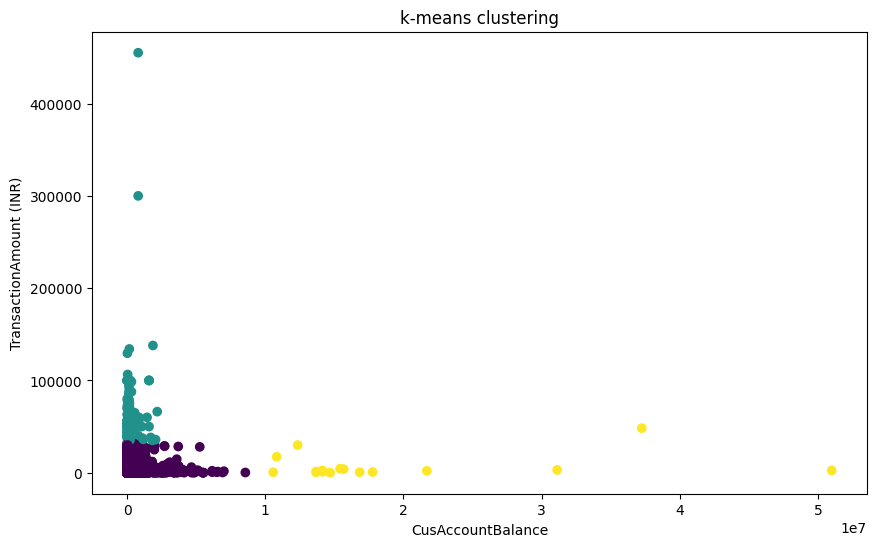

In [19]:
# based on the elbow method choose the optimal number of cluster (K)

# visualize and interpret the cluster


plt.figure(figsize=(10,6))
plt.scatter(data['CustAccountBalance'],data['TransactionAmount (INR)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('CusAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('k-means clustering')
plt.show()
